In [1]:
from visualization import draw
from IPython.display import HTML
#from tqdm.notebook import tqdm

In [2]:
from agent import Agent
from high_level_policy import HCBS
from map_handler import Map
from node import GridNode

In [3]:
height = 15
width = 30
mapstr = '''
# . . # 
. . . .  
. . . . 
# . . # 
'''
agent1 = Agent(0, 1, 3, 2)
agent2 = Agent(1, 0, 2, 3)

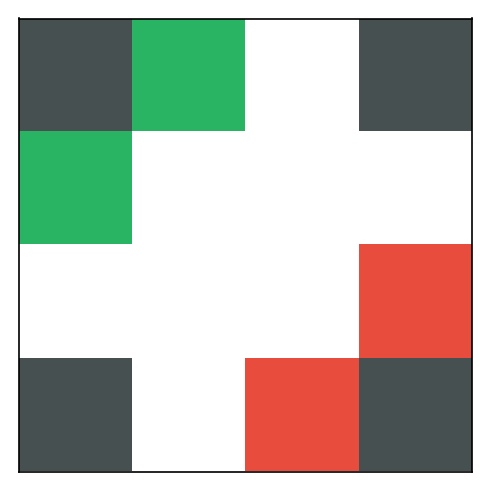

In [4]:
test_map = Map()
test_map.read_from_string(mapstr, 4, 4)
draw(test_map, [agent1, agent2])

In [5]:
def SimpleTest(SearchFunction, height, width, mapstr, agents, **kwargs):
    task_map = Map()
    task_map.read_from_string(mapstr, width, height, diagonal_movements=False)

    solution = SearchFunction(task_map, agents, **kwargs)
    anim = draw(task_map, [agent1, agent2], solution)
    return anim
#         if result[0]:
#             path = MakePath(result[1])
#             correct = abs(path[1] - pathLen) < EPS
#             print("Path found! Length: " + str(path[1]) + ". Nodes created: " + str(nodesCreated) + ". Number of steps: " + str(numSteps) + ". Optimal: " + str(correct))
#         else:
#             print("Path not found!")
#     except Exception as e:
#         print("Execution error")
#         print(e)

Solution was found, cost =  9


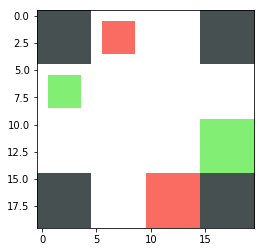

In [6]:
from low_level_policy import manhattan_distance

anim = SimpleTest(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance)

In [7]:
HTML(anim.to_html5_video())